# Predicting GCSE grades from prior assessments

The aim of this project is to determine if machine learning models can outperform classroom teachers in predicting pupils' final examination grades.

The setting is a UK secondary school where pupils have attended for 5 years before sitting their final GCSE exams at age 16.

Our data will be the results of pupils' in-class assessments and their final GCSE results.

To select the most appropriate model to make predictions we will spot-check a range of classification models and some common hyperparameters and rank them according by the proportion of accurate predictions made. 

If we find a model that could predict with greater accuracy than a classroom teacher then we will dive a little deeper and try to maximise the model's predictive accuracy and consider deploying the model for future use.

*Spoiler alert: the model created in this project offers about the same predictive accuracy as a classroom teacher. There still may be benefits of continuing to use the model, however. You can jump to the [conclusion](#conclusion) to explore my findings and evaluation further.*

## Contents

1. [Define the problem](#define_problem)
2. [Success criteria](#success_criteria)
3. [Data collection](#data_collection)
4. [Data preparation, EDA, feature engineering](#EDA)
5. [Modelling](#modelling)
6. [Experimentation](#experiment)


## Define the problem
<a name="define_problem"></a>

In the school where I work mathematics teachers usually predict GCSE grades with between 50% and 60% accuracy each year. As a maths teacher myself I know how tricky the process is on so many levels. For example:
1. when it is too hard to call between one grade and another
2. some pupils can unexpectedly underperform or overperform in their exams
3. having taught pupils for sometimes 2 or 3 years it is impossible to be objective in my own judgement of their capabilities when I have been working so hard to make sure they do well


## Define success criteria
<a name="success_criteria"></a>

In light of this, a machine learning model with over 60% accuracy in predictions will be worth exploring further.


## Data collection
<a name="data_collection"></a>

The pupil data we have collected constsists of test scores in mathematics collected during each pupil's five years of secondary school. 

The data is collected by question, and is grouped by either by total score (e.g. TEST 5: 61/80) or by skill (FRACTIONS: 72%).
Have a look at my Medium post __[How to make the most of pupil data](https://medium.com/@alex.kirkup/making-the-most-of-pupil-data-7aca41e53d97)__ which explains our processes and how skills feedback has significantly improved pupils' learning.

Our new scheme of assessment has six tests in years 7, 8 and 9; four tests in year 10; an end of year mock exam at the end of year 10; and two mock exams during year 11. 

However you will notice that some of the data is from the old scheme of assessment and has different titles.

Furthermore there are some missing test results which are due to interruptions to schooling during the pandemic.

Importantly, there are not many records - 226 in all.


### Dealing with two different ways to look at the data.

Having data which can be grouped in two different ways gives me two different avenues to explore.

Initially I will use the data for total scores and see whether this can produce accurate predictions, and then try by skill. As a by-product, it would be of great value for example if a particular skill such as algebra was correlated strongly with final grades.

## Data preparation, EDA, feature engineering
<a name="EDA"></a>

First, to take into account the different tests, I will average the score for each year as a proportion of the total (0 to 1).

Second, there are various possible ways to deal with missing values (in this case missing test results), and I am not certain which is best. I will create two dataframes, one with missing scores omitted (df1), another with missing scores being given the median value for that test (df2). 

With such a small dataset I feel that omitting rows might be model-breaking, however using the median might skew results away from the pupil's actual potential.

In light of this I will run each model I test with both datasets.

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import pprint as pp

import matplotlib
import seaborn as sns

# disable warnings
import warnings
warnings.filterwarnings("ignore")

### Import data

In [2]:
df = pd.read_csv("data/gcse-higher-avg.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             226 non-null    int64  
 1   Y7 EOY Delta 1                 85 non-null     float64
 2   Unnamed: 2                     85 non-null     float64
 3   Y7 EOY Delta 2                 85 non-null     float64
 4   Unnamed: 4                     85 non-null     float64
 5   Y7 EOY Higher Tier Test        71 non-null     float64
 6   Unnamed: 6                     0 non-null      float64
 7   Y7 AVG                         156 non-null    float64
 8   Unnamed: 8                     89 non-null     float64
 9   Unnamed: 9                     89 non-null     float64
 10  Unnamed: 10                    48 non-null     float64
 11  Unnamed: 11                    48 non-null     float64
 12  Unnamed: 12                    86 non-null     flo

In [3]:
df.shape

(226, 51)

In [3]:
df.head()

,id,Y7 EOY Delta 1,Unnamed: 2,Y7 EOY Delta 2,Unnamed: 4,Y7 EOY Higher Tier Test,Unnamed: 6,Y7 AVG,Unnamed: 8,Unnamed: 9,...,Y10 EOY Mock Higher Paper 1,Y10 EOY Mock Higher Paper 2,Y10 MOCK AVG,Y11 Nov Mock Higher Paper 1,Y11 Nov Mock Higher Paper 2,Y11 NOV MOCK AVG,Y11 March Mock Higher Paper 1,Y11 March Mock Higher Paper 2,Y11 MAR MOCK AVG,Final grade
0,1273,NaN,NaN,NaN,NaN,51.0,NaN,0.51,NaN,NaN,...,29.0,48.0,0.48125,52.0,40.0,0.57500,52.0,37.0,0.55625,6
1,1274,NaN,NaN,NaN,NaN,62.0,NaN,0.62,NaN,NaN,...,41.0,53.0,0.58750,60.0,50.0,0.68750,53.0,52.0,0.65625,8
2,1275,NaN,NaN,NaN,NaN,49.0,NaN,0.49,NaN,NaN,...,40.0,47.0,0.54375,49.0,56.0,0.65625,39.0,43.0,0.51250,6
3,1276,NaN,NaN,NaN,NaN,78.0,NaN,0.78,NaN,NaN,...,42.0,61.0,0.64375,60.0,47.0,0.66875,52.0,52.0,0.65000,7
4,1277,NaN,NaN,NaN,NaN,91.0,NaN,0.91,NaN,NaN,...,57.0,70.0,0.79375,75.0,70.0,0.90625,78.0,74.0,0.95000,9


Keep only the averages for each year and each mock.

In [5]:
df = df[['Y7 AVG','Y8 AVG','Y9 AVG','Y10 AVG','Y10 MOCK AVG','Y11 NOV MOCK AVG','Y11 MAR MOCK AVG','Final grade']]
df.head()

,Y7 AVG,Y8 AVG,Y9 AVG,Y10 AVG,Y10 MOCK AVG,Y11 NOV MOCK AVG,Y11 MAR MOCK AVG,Final grade
0,0.51,0.544444,0.488889,0.510417,0.48125,0.57500,0.55625,6
1,0.62,0.727778,0.647917,0.775000,0.58750,0.68750,0.65625,8
2,0.49,0.761111,0.539583,0.666667,0.54375,0.65625,0.51250,6
3,0.78,0.877778,0.631250,0.668750,0.64375,0.66875,0.65000,7
4,0.91,0.972222,0.816667,0.979167,0.79375,0.90625,0.95000,9


In [6]:
df.shape

(226, 8)

### Replace missing values

Pupils may have missed tests for various reasons. We will try 1) replacing these with the median, and 2) removing these rows.

In [7]:
df1 = df.fillna(df.median())
df1.head()

,Y7 AVG,Y8 AVG,Y9 AVG,Y10 AVG,Y10 MOCK AVG,Y11 NOV MOCK AVG,Y11 MAR MOCK AVG,Final grade
0,0.51,0.544444,0.488889,0.510417,0.48125,0.57500,0.55625,6
1,0.62,0.727778,0.647917,0.775000,0.58750,0.68750,0.65625,8
2,0.49,0.761111,0.539583,0.666667,0.54375,0.65625,0.51250,6
3,0.78,0.877778,0.631250,0.668750,0.64375,0.66875,0.65000,7
4,0.91,0.972222,0.816667,0.979167,0.79375,0.90625,0.95000,9


In [8]:
df1.shape

(226, 8)

In [9]:
df2 = df.dropna()
df2.head()

,Y7 AVG,Y8 AVG,Y9 AVG,Y10 AVG,Y10 MOCK AVG,Y11 NOV MOCK AVG,Y11 MAR MOCK AVG,Final grade
0,0.51,0.544444,0.488889,0.510417,0.48125,0.57500,0.55625,6
1,0.62,0.727778,0.647917,0.775000,0.58750,0.68750,0.65625,8
2,0.49,0.761111,0.539583,0.666667,0.54375,0.65625,0.51250,6
3,0.78,0.877778,0.631250,0.668750,0.64375,0.66875,0.65000,7
4,0.91,0.972222,0.816667,0.979167,0.79375,0.90625,0.95000,9


In [10]:
df2.shape

(144, 8)

Neither method is perfect, however a reduction of nearly 100 rows because of missing values for df2 is highly significant. We will have to see how this impacts the accuracy of the model's predictions.

Finally, let's create a list of df1 and df2 ready to try both with each model.

In [11]:
df_list = [df1,df2]

## Modelling
<a name="modelling"></a>

We will select the three best models by spot checking. My inspiration for this was from __[this](https://machinelearningmastery.com/spot-check-machine-learning-algorithms-in-python/)__ template from Jason Brownlee at Machine Learning Mastery.

First, how will we judge if a model is successful or not?

### How to measure predictive accuracy

Bex T's Medium article __[here](https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd)__ gives a fantastic overview of the metrics that can be applied to this sort of multiclass-classification problem.

**Accuracy** is the appropriate measurement we will need, as the score it returns will be the proportion of correct predictions - all other results are incorrect irrespective of how wide of the mark they are.

**Cross validation** will be essential here because of the small sample size. With 226 records, an 80-20 train-test split will provide only 45 results for the test. This is potentially so small that there will be a high variability due to chance from our machine learning model. Dima Shulga gives a great explanation of this __[here](https://towardsdatascience.com/5-reasons-why-you-should-use-cross-validation-in-your-data-science-project-8163311a1e79)__. Cross validation allows us to get more metrics and draw better conclusions.

### Create a dict of classification models with common hyperparameters

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


# function which can take a dict of already-existing models as an argument
def define_models(models=dict()):
    
    # linear models
    models['logistic'] = LogisticRegression(random_state = 42)
    for a in [0.3, 0.7, 1.0]:
        models['ridge-'+str(a)] = RidgeClassifier(alpha=a, random_state = 42)
    models['sgd'] = SGDClassifier(max_iter=1000, tol=1e-3, random_state = 42)
    models['pa'] = PassiveAggressiveClassifier(max_iter=1000, tol=1e-3, random_state = 42)
    
    # non-linear models
    n_neighbors = [3,7,15]
    for k in n_neighbors:
        models['knn-'+str(k)] = KNeighborsClassifier(n_neighbors=k)
    models['cart'] = DecisionTreeClassifier(random_state = 42)
    models['extra'] = ExtraTreeClassifier(random_state = 42)
    models['svml'] = SVC(kernel='linear', random_state = 42)
    models['svmp'] = SVC(kernel='poly', random_state = 42)
    for c in [0.3, 0.7, 1.0]:
        models['svmr'+str(c)] = SVC(C=c, random_state = 42)
    models['bayes'] = GaussianNB()
 
    # ensemble models
    n_trees = 100
    models['ada'] = AdaBoostClassifier(n_estimators=n_trees, random_state = 42)
    models['bag'] = BaggingClassifier(n_estimators=n_trees, random_state = 42)
    models['rf'] = RandomForestClassifier(n_estimators=n_trees, random_state = 42)
    models['et'] = ExtraTreesClassifier(n_estimators=n_trees, random_state = 42)
    models['gbm'] = GradientBoostingClassifier(n_estimators=n_trees, random_state = 42)
    
    print(f'Defined {len(models)} models')
    print()
 
    return models

### Create a function to generalise the process of predicting and calculating accuracy for each model

In [13]:
from sklearn.model_selection import cross_val_score, train_test_split

def predict_and_calc_accuracy(model, X, y):

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
    # Fit
    model.fit(X_train, y_train)

    # Cross-validation
    accuracy = cross_val_score(
        model,
        X_train,
        y_train,
        scoring='accuracy',
        cv=5,
    )
    return accuracy

### Spot check the classification models

In [30]:
models = define_models()

results = {}
        
for key,model in models.items(): 

    # Go
    counter = 0
    for df in df_list:
        
        counter += 1

        # Create X (all the feature columns)
        X = df_list[counter-1].drop(["Final grade"], axis=1)

        # Create y (the target column)
        y = df_list[counter-1]["Final grade"]

        # Get results
        model_result = np.mean(predict_and_calc_accuracy(model, X, y))
        model_result = round(model_result, 4)
        results[f'{key}, df{counter}'] = model_result
        print(f'{key}, df{counter} = {model_result}')
        
results = sorted(results.items(),reverse=True,key=lambda item: item[1])[:10]

print()
print("Best 10")
print("=======")
pp.pprint(results)


Defined 22 models

logistic, df1 = 0.4667
logistic, df2 = 0.5565
ridge-0.3, df1 = 0.4333
ridge-0.3, df2 = 0.487
ridge-0.7, df1 = 0.4389
ridge-0.7, df2 = 0.487
ridge-1.0, df1 = 0.4222
ridge-1.0, df2 = 0.4783
sgd, df1 = 0.3167
sgd, df2 = 0.3739
pa, df1 = 0.4
pa, df2 = 0.3478
knn-3, df1 = 0.4667
knn-3, df2 = 0.513
knn-7, df1 = 0.4833
knn-7, df2 = 0.5217
knn-15, df1 = 0.5611
knn-15, df2 = 0.5739
cart, df1 = 0.5333
cart, df2 = 0.5826
extra, df1 = 0.5111
extra, df2 = 0.5565
svml, df1 = 0.5
svml, df2 = 0.6348
svmp, df1 = 0.6167
svmp, df2 = 0.6
svmr0.3, df1 = 0.4889
svmr0.3, df2 = 0.6174
svmr0.7, df1 = 0.5556
svmr0.7, df2 = 0.5739
svmr1.0, df1 = 0.5667
svmr1.0, df2 = 0.5043
bayes, df1 = 0.5833
bayes, df2 = 0.6
ada, df1 = 0.4167
ada, df2 = 0.4522
bag, df1 = 0.65
bag, df2 = 0.6348
rf, df1 = 0.5556
rf, df2 = 0.6
et, df1 = 0.6222
et, df2 = 0.5826
gbm, df1 = 0.65
gbm, df2 = 0.6261

Best 10
[('bag, df1', 0.65),
 ('gbm, df1', 0.65),
 ('svml, df2', 0.6348),
 ('bag, df2', 0.6348),
 ('gbm, df2', 0.6261)

There are a small number of models scoring above 60% accuracy which is promising.

Let's next look at our second way of looking at the data - i.e. by skill - to see if it offers any improvement in making predictions.

### Round 2 - try the same steps again with data by skill

In [15]:
df_skills = pd.read_csv("data/gcse-higher-by-skill.csv")
df_skills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       215 non-null    object 
 1   Final year                 215 non-null    int64  
 2   Class                      215 non-null    object 
 3   TOPIC: NUMBER SKILLS       215 non-null    object 
 4   TOPIC: FRACTIONS           215 non-null    object 
 5   TOPIC: PERCENTAGES         215 non-null    object 
 6   TOPIC: RATIO & PROPORTION  215 non-null    object 
 7   TOPIC: ALGEBRA SKILLS      215 non-null    object 
 8   TOPIC: SEQUENCES           215 non-null    object 
 9   TOPIC: GRAPHING            215 non-null    object 
 10  TOPIC: MEASURES            215 non-null    object 
 11  TOPIC: 2D GEOMETRY         215 non-null    object 
 12  TOPIC: 3D GEOMETRY         215 non-null    object 
 13  TOPIC: PYTHAG & TRIG       215 non-null    object 

In [16]:
df_skills.shape

(215, 20)

In [17]:
# notice above: 'object' not number data types 
# let's find how values are encoded
df_skills['TOPIC: FRACTIONS'].unique()

array(['94%', '100%', '83%', '89%', '78%', '61%', '72%', '39%', '67%',
       '45%', '56%', '0%', '81%', '69%', '88%', '50%', 'N', '31%', '75%',
       '63%', '38%', '60%', '80%', '44%'], dtype=object)

In [18]:
# remove 'N' rows and null rows
# also encode '%' rows (which are actually strings) as float
df_skills = df_skills.dropna()
for column in df_skills:
    if column[0:5]=="TOPIC":
        # remove all rows with 'N' (df[df[column]=='N'].index returns list of all such rows)
        df_skills.drop(df_skills[df_skills[column]=='N'].index,inplace=True)
        # remove last character ('%') and encode integer as decimal
        df_skills[column] = df_skills[column].str[:-1].astype('float') / 100
df_skills.head()

,Name,Final year,Class,TOPIC: NUMBER SKILLS,TOPIC: FRACTIONS,TOPIC: PERCENTAGES,TOPIC: RATIO & PROPORTION,TOPIC: ALGEBRA SKILLS,TOPIC: SEQUENCES,TOPIC: GRAPHING,TOPIC: MEASURES,TOPIC: 2D GEOMETRY,TOPIC: 3D GEOMETRY,TOPIC: PYTHAG & TRIG,TOPIC: TRANSFORMATIONS,TOPIC: ANGLES,TOPIC: DATA & AVERAGES,TOPIC: REPRESENTING DATA,TOPIC: PROBABILITY,Final grade
0,ANDERSON Noah,2023,11X1,0.67,0.94,0.80,0.83,0.52,0.33,0.32,0.67,0.42,0.43,0.29,0.33,0.25,1.00,0.70,0.57,6.0
1,AXELSEN Katherine,2023,11X1,0.79,1.00,0.95,0.71,0.57,0.50,0.73,0.78,0.32,0.43,0.55,0.67,0.25,1.00,0.78,0.86,8.0
2,BARCLAY Kieran,2023,11X1,0.57,0.83,0.85,0.75,0.48,0.33,0.46,0.33,0.37,0.33,0.84,0.33,0.25,1.00,0.57,1.00,6.0
3,BARSTOW Sophia,2023,11X1,0.74,0.94,0.95,0.96,0.63,0.75,0.68,0.44,0.26,0.62,0.39,0.50,0.00,0.91,0.78,0.57,7.0
4,BROWN Freddie,2023,11X1,0.93,1.00,1.00,0.88,0.94,1.00,0.92,1.00,0.84,1.00,1.00,0.50,1.00,1.00,0.87,1.00,9.0


In [19]:
df_skills.shape

(207, 20)

We have lost only 6 rows after dropping null values and those encoded as 'N' so this is promising.

Let's try getting some results by skill and comparing them to our previous results.

First, remove unnecessary rows.

In [20]:
df_skills = df_skills.drop(columns=['Name','Final year','Class'])
df_skills.head()

,TOPIC: NUMBER SKILLS,TOPIC: FRACTIONS,TOPIC: PERCENTAGES,TOPIC: RATIO & PROPORTION,TOPIC: ALGEBRA SKILLS,TOPIC: SEQUENCES,TOPIC: GRAPHING,TOPIC: MEASURES,TOPIC: 2D GEOMETRY,TOPIC: 3D GEOMETRY,TOPIC: PYTHAG & TRIG,TOPIC: TRANSFORMATIONS,TOPIC: ANGLES,TOPIC: DATA & AVERAGES,TOPIC: REPRESENTING DATA,TOPIC: PROBABILITY,Final grade
0,0.67,0.94,0.80,0.83,0.52,0.33,0.32,0.67,0.42,0.43,0.29,0.33,0.25,1.00,0.70,0.57,6.0
1,0.79,1.00,0.95,0.71,0.57,0.50,0.73,0.78,0.32,0.43,0.55,0.67,0.25,1.00,0.78,0.86,8.0
2,0.57,0.83,0.85,0.75,0.48,0.33,0.46,0.33,0.37,0.33,0.84,0.33,0.25,1.00,0.57,1.00,6.0
3,0.74,0.94,0.95,0.96,0.63,0.75,0.68,0.44,0.26,0.62,0.39,0.50,0.00,0.91,0.78,0.57,7.0
4,0.93,1.00,1.00,0.88,0.94,1.00,0.92,1.00,0.84,1.00,1.00,0.50,1.00,1.00,0.87,1.00,9.0


In [21]:
models_by_skill = define_models()
X = df_skills.drop(["Final grade"], axis=1)
y = df_skills["Final grade"]

results_by_skill = {}
        
for key,model in models.items(): 

    # Get results
    model_result = np.mean(predict_and_calc_accuracy(model, X, y))#np.mean([predict_and_calc_accuracy(X.tail(-1),y.tail(-1),model).mean() for _ in range(1,3+1)])
    model_result = round(model_result, 4)
    results_by_skill[key] = model_result
    print(f'{key} = {model_result}')
        
results_by_skill = sorted(results_by_skill.items(),reverse=True,key=lambda item: item[1])[:10]

print()
print("Best 10")
print("=======")
pp.pprint(results_by_skill)


Defined 22 models

logistic = 0.4788
ridge-0.3 = 0.4061
ridge-0.7 = 0.4
ridge-1.0 = 0.3515
sgd = 0.3394
pa = 0.2909
knn-3 = 0.4424
knn-7 = 0.5091
knn-15 = 0.5273
cart = 0.5091
extra = 0.4667
svml = 0.5333
svmp = 0.5394
svmr0.3 = 0.4606
svmr0.7 = 0.4727
svmr1.0 = 0.5333
bayes = 0.5879
ada = 0.4
bag = 0.5939
rf = 0.5636
et = 0.5455
gbm = 0.4606

Best 10
[('bag', 0.5939),
 ('bayes', 0.5879),
 ('rf', 0.5636),
 ('et', 0.5455),
 ('svmp', 0.5394),
 ('svml', 0.5333),
 ('svmr1.0', 0.5333),
 ('knn-15', 0.5273),
 ('knn-7', 0.5091),
 ('cart', 0.5091)]


It would appear that the results are less accurate when data is grouped by skill compared to grouped by test score.

Therefore we will return to our initial approach.

### Look at best model using a confusion matrix and confusion report

The joint best model is a __[Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)__ with 100 estimators, with the data being in df1 (where missing values were replaced by median values).

Let's explore its predictions.

[Text(0, 0.5, '9'),
 Text(0, 1.5, '8'),
 Text(0, 2.5, '7'),
 Text(0, 3.5, '6'),
 Text(0, 4.5, '5'),
 Text(0, 5.5, '4')]

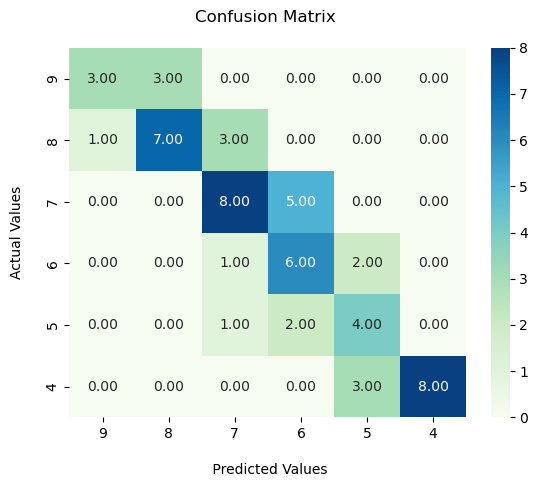

In [24]:
labels = [9,8,7,6,5,4]
fx=sns.heatmap(confusion_matrix(y_test,y_preds), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(labels)
fx.yaxis.set_ticklabels(labels)
#fx.figure(figsize=(10,6))
#fx.show()

Although the central spine (top-left to bottom-right) of correct predictions is solid, there are still a number of predictions that are either side of the line and therefore incorrect.

### Out of interest: Which features carried the greatest weight?

Let's check the relative weight of each feature in making the model's predictions.

In [27]:
feature_importances_dict = dict(zip(X.columns,model.feature_importances_))
print(feature_importances_dict)

{'Y7 AVG': 0.02468719804780326, 'Y8 AVG': 0.05501068805322771, 'Y9 AVG': 0.059231025030798364, 'Y10 AVG': 0.055688570149461845, 'Y10 MOCK AVG': 0.03650168882550926, 'Y11 NOV MOCK AVG': 0.050218398182883726, 'Y11 MAR MOCK AVG': 0.7186624317103159}


By far the highest weight goes to the final mock grade a few months before the exam: 71%.

### Summary
<a name="conclusion"></a>

At 65%, the Gradient Boosting Classifier model is showing a promising degree of accuracy compared to our minimum requirement of 60%. However this result is not high enough above the success threshold yet to feel confident about the model's universal validity going forward.

On the plus side, in addition to the accuracy, errors seem to be evenly distributed either side of being correct (some predictions above, some below), with only one result more than one grade away from the correct prediction.

The most important potential negative is that we don't know about overfitting yet.

We now need to see if hyperparameter tuning can improve the accuracy of the model sufficiently above 60% to make it a viable alternative to teacher predictions.


### Hyperparameter tuning spot-check: can the basic model be improved?

[Mohtadi Ben Fraj](https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae) provides a deep overview of the steps for a Gradient Boosting model.

In [37]:
gbm_grid = {
    'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
    'n_estimators' : [1, 2, 4, 8, 16, 32, 64, 100, 200],
    'max_depth' : np.linspace(1, 32, 32, endpoint=True, dtype=int),
    'min_samples_split' : np.linspace(0.1, 1.0, 5, endpoint=True),
    'min_samples_leaf' : np.linspace(0.1, 0.5, 5, endpoint=True),
    'max_features' : list(range(1,df1.shape[1])),
}


In [40]:
from sklearn.model_selection import RandomizedSearchCV

gbm_random_search = RandomizedSearchCV(
    estimator = models['gbm'], 
    param_distributions = gbm_grid, 
    n_iter = 40, 
    cv = 5, 
    verbose = 3, 
    random_state=42, 
    n_jobs = -1,
)

gbm_random_search.fit(X_train, y_train)

print(gbm_random_search.best_params_)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'n_estimators': 100, 'min_samples_split': 0.775, 'min_samples_leaf': 0.1, 'max_features': 4, 'max_depth': 1, 'learning_rate': 0.01}


In [41]:
gbm_random_search.best_score_

0.6096256684491979

## Evaluation and future experimentation
<a name="experiment"></a>

This result suggests we have reached the end of the road (for now).

We discovered that we could achieve 65% accuracy with a vanilla Gradient Boosting Classifier, which was 5% higher than our success criteria.

However hyperparameter tuning has created a best score of only 61%, when we are expecting a score increase!

The issue here is almost certainly not enough data to use for training the model.

I will return to the model when I have more data to use.

## Appendix 1: Halving Grid Search as alternative hyperparameter tuning

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

gbm_halving_grid = {
    'model__learning_rate' : [1, 0.667, 0.444, 0.296, 0.198, 0.132, 0.088, 0.058, 0.02, 0.01],
    'model__n_estimators' : [1, 2, 4, 8, 16, 32, 64, 100, 200],
    'model__max_depth' : [1, 4, 8, 12, 16, 20, 24, 28, 32],#np.linspace(1, 32, 32, endpoint=True),
    'model__min_samples_split' : np.linspace(0.1, 1.0, 5, endpoint=True),
    'model__min_samples_leaf' : np.linspace(0.1, 0.5, 5, endpoint=True),
    'model__max_features' : list(range(1,df1.shape[1])),
}

gbm_halving = HalvingGridSearchCV(
    estimator = models['gbm'], 
    resource='n_samples',
    #min_resources=len(X_train) // 4,
    factor=2, 
    param_grid=gbm_grid, 
)

gbm_halving.fit(X_train, y_train)

print(gbm_halving.best_params_)


In [ ]:
gbm_best = GradientBoostingClassifier(**gbm_random.best_params_)

gbm_best.fit(X_train, y_train)

y_preds = gbm_best.predict(X_test)

print(f'Confusion Matrix')
print(f'================')
print(confusion_matrix(y_test,y_preds))
print()
print(f'Confusion Report')
print(f'================')
print(classification_report(y_test,y_preds))

## Appendix 2: Alternative tuning methodology - for future reference

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#gbm_random = RandomizedSearchCV(
#    estimator = models['gbm'], 
#    param_distributions = gbm_grid, 
#    n_iter = 20, 
#    cv = 5, 
#    verbose = 2, 
#    random_state=42, 
#    n_jobs = -1,
#)

#bag_random = RandomizedSearchCV(
#    estimator = models['bag'], 
#    param_distributions = bag_grid, 
#    n_iter = 10, 
#    cv = 5, 
#    verbose = 2, 
#    random_state=42, 
#    n_jobs = -1,
#)

gbm_models = []
for learning_rate in gbm_grid['learning_rate']:
    this_model = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=learning_rate,
        random_state = 42,
        )
    this_result = np.mean(predict_and_calc_accuracy(this_model,X,y))
    gbm_models.append({
        'model' : this_model,
        'learning_rate' : learning_rate,
        'result' : this_result,
    })
    print(f'learning_rate={learning_rate}, accuracy={this_result}')
    
#gbm_random.fit(X_train, y_train)

#gbm_random.best_params_


#bag_random.fit(X_train, y_train)
#
#bag_random.best_params_

In [ ]:
best_learning_rate = 0.444

for n_estimators in gbm_grid['n_estimators']:
    this_model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=best_learning_rate,
        random_state = 42,
        )
    this_result = np.mean(predict_and_calc_accuracy(this_model,X,y))
    gbm_models.append({
        'model' : this_model,
        'learning_rate' : learning_rate,
        'n_estimators' : n_estimators,
        'result' : this_result,
    })
    print(f'n_estimators={n_estimators}, accuracy={this_result}')
    

In [ ]:
best_n_estimators = 32

for max_depth in gbm_grid['max_depth']:
    this_model = GradientBoostingClassifier(
        n_estimators=best_n_estimators,
        learning_rate=best_learning_rate,
        max_depth=max_depth,
        random_state = 42,
        )
    this_result = np.mean(predict_and_calc_accuracy(this_model,X,y))
    gbm_models.append({
        'model' : this_model,
        'learning_rate' : learning_rate,
        'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'result' : this_result,
    })
    print(f'max_depth={max_depth}, accuracy={this_result}')
    

In [ ]:
best_max_depth = 20

for min_samples_split in gbm_grid['min_samples_split']:
    this_model = GradientBoostingClassifier(
        n_estimators=best_n_estimators,
        learning_rate=best_learning_rate,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state = 42,
        )
    this_result = np.mean(predict_and_calc_accuracy(this_model,X,y))
    gbm_models.append({
        'model' : this_model,
        'learning_rate' : learning_rate,
        'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'result' : this_result,
    })
    print(f'min_samples_split={min_samples_split}, accuracy={this_result}')
    

In [ ]:
best_min_samples_split = 0.55

for min_samples_leaf in gbm_grid['min_samples_leaf']:
    this_model = GradientBoostingClassifier(
        n_estimators=best_n_estimators,
        learning_rate=best_learning_rate,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state = 42,
        )
    this_result = np.mean(predict_and_calc_accuracy(this_model,X,y))
    gbm_models.append({
        'model' : this_model,
        'learning_rate' : learning_rate,
        'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf,
        'result' : this_result,
    })
    print(f'min_samples_leaf={min_samples_leaf}, accuracy={this_result}')
    